# Notebook 09 - Pandas

https://pandas.pydata.org/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#  sometimes necessary for plotting with Jupyter+pandas+pyplot
%matplotlib inline

We've learned about multiple data structures (lists, numpy arrays etc.)

Today we will introduce a few new data structures which are contained with the Pandas python library for data analysis.

Pandas Series (series of data)

Pandas DataFrame (tabular data)


## Pandas Series


In [ ]:
s = pd.Series([77134,76424,33104,13441,36505,29176,34994])

In [ ]:
s

0    77134
1    76424
2    33104
3    13441
4    36505
5    29176
6    34994
dtype: int64

The series object we introduced above contains elements of type int64 and is indexed by integers 0-6

The series object has index and values attributes which allow you to extract the indeces and values separately:

In [ ]:
s.index

RangeIndex(start=0, stop=7, step=1)

In [ ]:
s.values

array([77134, 76424, 33104, 13441, 36505, 29176, 34994])

In [ ]:
s[0:2]

0    77134
1    76424
dtype: int64

In [ ]:
s[3]

13441

### Series Descriptive Index

Series in pandas allow you to use a more descriptive index

For example, the numbers listed above could be the poppulations of Indiana towns. Therefore we can assign the index attribute of a the Series object to a list with the names of these towns as the index.

In [ ]:
s.index = ["Hammond", "Gary", "Valparaiso", "Chesterton", "Portage", "Crown Point", "Merrillville"]

In [ ]:
s

Hammond         77134
Gary            76424
Valparaiso      33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
dtype: int64

In [ ]:
s["Crown Point"]

29176

In [ ]:
s.Merrillville

34994

In [ ]:
s[4]

36505

We can also give a descriptive name to the Series object name attribute:

In [ ]:
s.name = "Population"

In [ ]:
s

Hammond         77134
Gary            76424
Valparaiso      33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

We could of done all of this at once:

In [ ]:
s = pd.Series([77134,76424,33104,13441,36505,29176,34994], name="Population",index=["Hammond", "Gary", "Valparaiso", "Chesterton", "Portage", "Crown Point", "Merrillville"])

In [ ]:
s

Hammond         77134
Gary            76424
Valparaiso      33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

We could of done this with numpy arrays but we would have had to stick with integer indeces:


In [ ]:
pop = np.array([77134,76424,33104,13441,36505,29176,34994])
town = np.array(["Hammond", "Gary", "Valparaiso", "Chesterton", "Portage", "Crown Point", "Merrillville"])

In [ ]:
print("The population of",town[2],"is",pop[2])


The population of Valparaiso is 33104


As you can see pandas Series can be a more convenient container for storying one-dimensinal arrays

You can give a series objects mutliple indeces and it will return a new Series object which is a subset of the original



In [ ]:
r = s[["Chesterton","Portage"]]
r

Chesterton    13441
Portage       36505
Name: Population, dtype: int64

### Series Statistical Methods

There are built in statistical methods:

In [ ]:
s.median()

34994.0

In [ ]:
s.mean()

42968.28571428572

In [ ]:
s.std()

24328.775916010007

In [ ]:
s.min()

13441

In [ ]:
s.max()

77134

And there is a built in method to give a summary of all of the statisics:

In [ ]:
s.describe()

count        7.000000
mean     42968.285714
std      24328.775916
min      13441.000000
25%      31140.000000
50%      34994.000000
75%      56464.500000
max      77134.000000
Name: Population, dtype: float64

### Plotting a Pandas Series

The pandas Series interfaces with pyplot:

<Axes: >

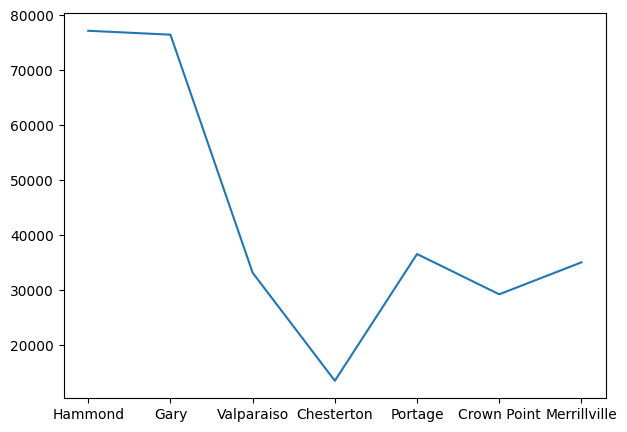

In [ ]:
plt.rcParams['figure.figsize'] = 7, 5
s.plot()

<Axes: >

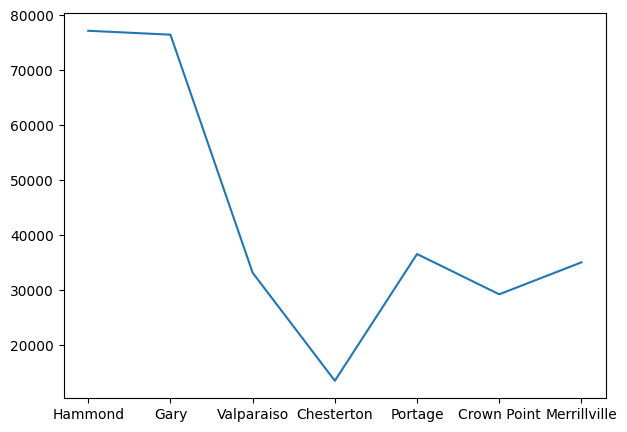

In [ ]:
s.plot(kind="line")

<Axes: >

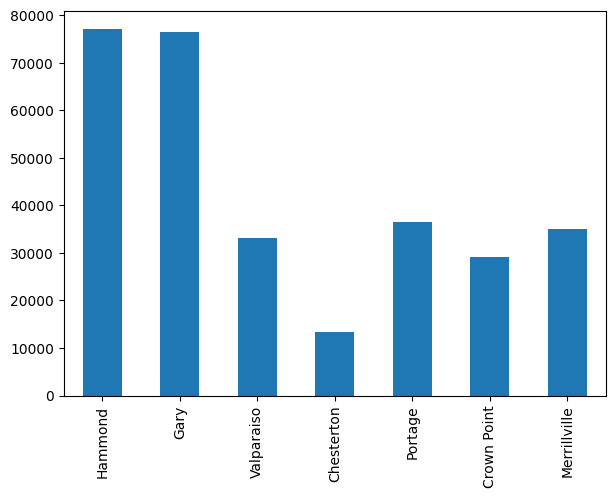

In [ ]:
s.plot(kind="bar")

<Axes: >

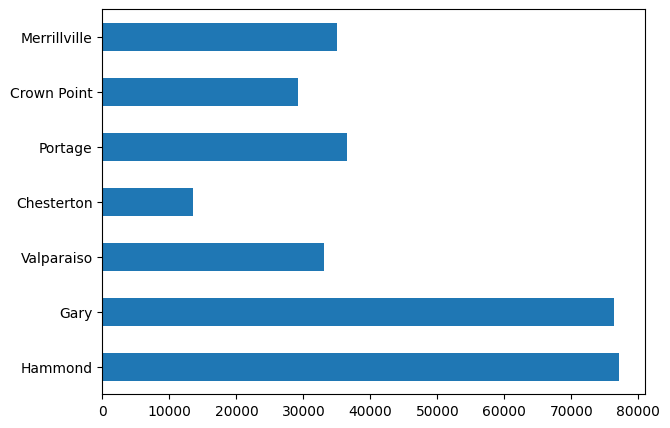

In [ ]:
s.plot(kind="barh")

<Axes: >

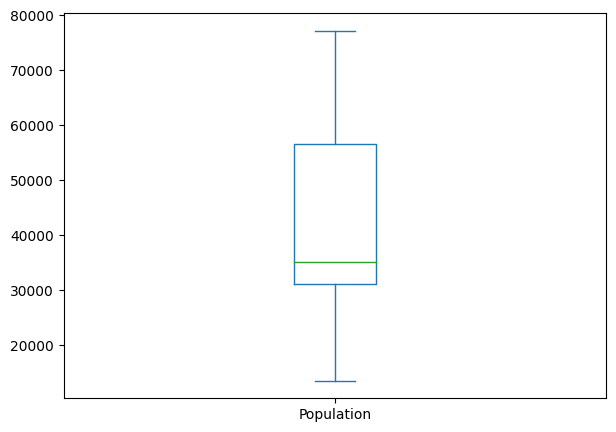

In [ ]:
s.plot(kind="box")
# red median
# box 1st quartile - 3rd quartile
# black lines give the max and min values

<Axes: >

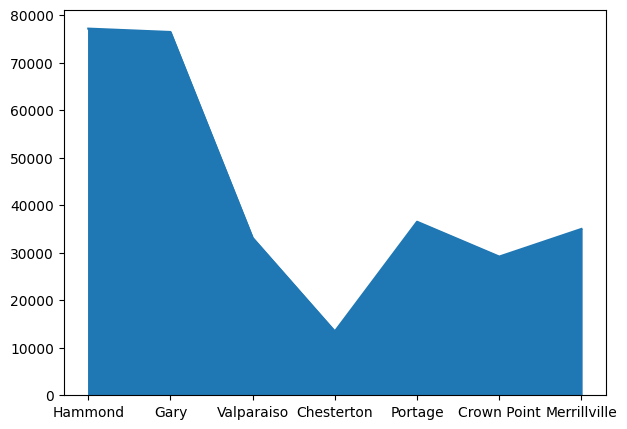

In [ ]:
s.plot(kind="area")

<Axes: ylabel='Population'>

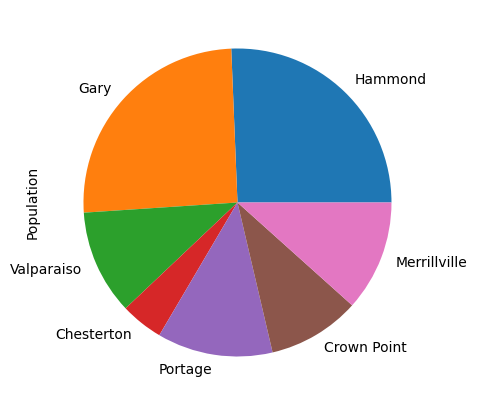

In [ ]:
s.plot(kind="pie")

Pandas Series behaives like a numpy array

In [ ]:
s[2]

33104

In [ ]:
s[0:2]

Hammond    77134
Gary       76424
Name: Population, dtype: int64

In [ ]:
s[2:]

Valparaiso      33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [ ]:
s

Hammond         77134
Gary            76424
Valparaiso      33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [ ]:
s.median()

34994.0

In [ ]:
s[ s > s.median()]

Hammond    77134
Gary       76424
Portage    36505
Name: Population, dtype: int64

In [ ]:
s.mean()

42968.28571428572

In [ ]:
s[ s > s.mean()]

Hammond    77134
Gary       76424
Name: Population, dtype: int64

In [ ]:
s[[4,3,2]]

Portage       36505
Chesterton    13441
Valparaiso    33104
Name: Population, dtype: int64

In [ ]:
np.cos(s)

Hammond        -0.046356
Gary           -0.046296
Valparaiso     -0.507764
Chesterton      0.299500
Portage         0.953355
Crown Point    -0.999579
Merrillville   -0.979954
Name: Population, dtype: float64

Series also behave like dictionaries

In [ ]:
d = {'food': 'Beans', 'count': 4, 'type': 'canned'}  # use curly braces for dictionaries

In [ ]:
d['type']

'canned'

In [ ]:
s['Gary']

76424

In [ ]:
#s['gary']

In [ ]:
'Portage' in s

True

In [ ]:
'portage' in s

False

In [ ]:
'Chicago' in s

False

In [ ]:
s + s

Hammond         154268
Gary            152848
Valparaiso       66208
Chesterton       26882
Portage          73010
Crown Point      58352
Merrillville     69988
Name: Population, dtype: int64

In [ ]:
s*500

Hammond         38567000
Gary            38212000
Valparaiso      16552000
Chesterton       6720500
Portage         18252500
Crown Point     14588000
Merrillville    17497000
Name: Population, dtype: int64

In [ ]:
s

Hammond         77134
Gary            76424
Valparaiso      33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [ ]:
s[2:]

Valparaiso      33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [ ]:
s[:-2]

Hammond       77134
Gary          76424
Valparaiso    33104
Chesterton    13441
Portage       36505
Name: Population, dtype: int64

In [ ]:
s[2:]+ s[:-2]

Chesterton      26882.0
Crown Point         NaN
Gary                NaN
Hammond             NaN
Merrillville        NaN
Portage         73010.0
Valparaiso      66208.0
Name: Population, dtype: float64

In [ ]:
q = pd.Series([77134], name="Population",index=["Hammond"])

In [ ]:
s+q

Chesterton           NaN
Crown Point          NaN
Gary                 NaN
Hammond         154268.0
Merrillville         NaN
Portage              NaN
Valparaiso           NaN
Name: Population, dtype: float64

In [ ]:
s.dot(s) # dot product

16475251066

Adding unaligned Series will form the union of the indexes involved (if a label is not found for one of the series it will return NaN). In some cases this makes life easier than when working with numpy arrays.

In [ ]:
s

Hammond         77134
Gary            76424
Valparaiso      33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [ ]:
s.name = "Npeople"

In [ ]:
s

Hammond         77134
Gary            76424
Valparaiso      33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Npeople, dtype: int64

In [ ]:
# copy a Series but give it a different name
s2 = s.rename("CountPeople")

In [ ]:
s

Hammond         77134
Gary            76424
Valparaiso      33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Npeople, dtype: int64

In [ ]:
s2

Hammond         77134
Gary            76424
Valparaiso      33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: CountPeople, dtype: int64

## Pandas DataFrame

Series were good for 1-D arrays, the Series DataFrame object is good for higher dimensional arrays (it can be viewed as a collection of Series objects with a common index)

There are multiple ways to initialize a DataFrame

In [ ]:
# Pass a nested list then label the indeces and columns:
df = pd.DataFrame([
    [77134,  "Lake",31.3],
    [76424,  "Lake",28.5],
    [33104,"Porter",34.1],
    [13441,"Porter",31.2],
    [36505,"Porter",30.3],
    [29176,  "Lake",35.3],
    [34994,  "Lake",33.8]
])


In [ ]:
df

,0,1,2
0,77134,Lake,31.3
1,76424,Lake,28.5
2,33104,Porter,34.1
3,13441,Porter,31.2
4,36505,Porter,30.3
5,29176,Lake,35.3
6,34994,Lake,33.8


In [ ]:
df.index = ["Hammond", "Gary", "Valparaiso", "Chesterton", "Portage", "Crown Point", "Merrillville"]

In [ ]:
df

,0,1,2
Hammond,77134,Lake,31.3
Gary,76424,Lake,28.5
Valparaiso,33104,Porter,34.1
Chesterton,13441,Porter,31.2
Portage,36505,Porter,30.3
Crown Point,29176,Lake,35.3
Merrillville,34994,Lake,33.8


In [ ]:
# Label the columns
df.columns = ["Population","County","Mean Age"]

In [ ]:
df

,Population,County,Mean Age
Hammond,77134,Lake,31.3
Gary,76424,Lake,28.5
Valparaiso,33104,Porter,34.1
Chesterton,13441,Porter,31.2
Portage,36505,Porter,30.3
Crown Point,29176,Lake,35.3
Merrillville,34994,Lake,33.8


In [ ]:
# Pass a nested list and label the indeces and columns all at once:
df = pd.DataFrame(
    [
        [77134,  "Lake",31.3],
        [76424,  "Lake",28.5],
        [33104,"Porter",34.1],
        [13441,"Porter",31.2],
        [36505,"Porter",30.3],
        [29176,  "Lake",35.3],
        [34994,  "Lake",33.8]
    ],
    index = ["Hammond", "Gary", "Valparaiso", "Chesterton", "Portage", "Crown Point", "Merrillville"],
    columns = ["Population","County","Mean Age"]
)


In [ ]:
df

,Population,County,Mean Age
Hammond,77134,Lake,31.3
Gary,76424,Lake,28.5
Valparaiso,33104,Porter,34.1
Chesterton,13441,Porter,31.2
Portage,36505,Porter,30.3
Crown Point,29176,Lake,35.3
Merrillville,34994,Lake,33.8


Alernative method: Setup the DataFrame witha  python dictionary
    
Recall:    
    
Dictionaries are not sequences like lists and tuples (there is no positional ordering).

Instead, objects are stored by "key" (the object is mapped to the key)

Dictionaries are mutable (they can be modified, grow, and shrink)


In [ ]:
d = {'food': 'Beans', 'count': 4, 'type': 'canned'}  # use curly braces for dictionaries

In [ ]:
d['food']

'Beans'

One can create a dataframe from a dictionary, with the dictionary keys turning into the column names

In [ ]:
df2 = pd.DataFrame(
    {
        "Population": [77134,76424,33104,13441,36505,29176,34994],
        "County": ["Lake", "Lake", "Porter", "Porter", "Porter", "Lake", "Lake"] ,
        "Mean age": [31.3, 28.5, 34.1, 31.2, 30.3, 35.3, 33.8]
    },
    index=["Hammond", "Gary", "Valparaiso", "Chesterton", "Portage", "Crown Point", "Merrillville"]
)

In [ ]:
df2

,Population,County,Mean age
Hammond,77134,Lake,31.3
Gary,76424,Lake,28.5
Valparaiso,33104,Porter,34.1
Chesterton,13441,Porter,31.2
Portage,36505,Porter,30.3
Crown Point,29176,Lake,35.3
Merrillville,34994,Lake,33.8


In [ ]:
df2.values # return an array

array([[77134, 'Lake', 31.3],
       [76424, 'Lake', 28.5],
       [33104, 'Porter', 34.1],
       [13441, 'Porter', 31.2],
       [36505, 'Porter', 30.3],
       [29176, 'Lake', 35.3],
       [34994, 'Lake', 33.8]], dtype=object)

In [ ]:
df2.index

Index(['Hammond', 'Gary', 'Valparaiso', 'Chesterton', 'Portage', 'Crown Point',
       'Merrillville'],
      dtype='object')

In [ ]:
df2.columns

Index(['Population', 'County', 'Mean age'], dtype='object')

In [ ]:
df2

,Population,County,Mean age
Hammond,77134,Lake,31.3
Gary,76424,Lake,28.5
Valparaiso,33104,Porter,34.1
Chesterton,13441,Porter,31.2
Portage,36505,Porter,30.3
Crown Point,29176,Lake,35.3
Merrillville,34994,Lake,33.8


In [ ]:
#Access individual columns:
df2["Population"]

Hammond         77134
Gary            76424
Valparaiso      33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [ ]:
# Another way
df2.Population

Hammond         77134
Gary            76424
Valparaiso      33104
Chesterton      13441
Portage         36505
Crown Point     29176
Merrillville    34994
Name: Population, dtype: int64

In [ ]:
type(df2["Population"])

pandas.core.series.Series

In [ ]:
#Access indivdiual rows:
#  use loc for label based indexing
#  use iloc for positional indexing
#  do not use ix (depricated)

df2.loc["Portage"]

Population     36505
County        Porter
Mean age        30.3
Name: Portage, dtype: object

In [ ]:
df2.iloc[0]

Population    77134
County         Lake
Mean age       31.3
Name: Hammond, dtype: object

In [ ]:
# Pass mutliple row labels and return a new dataframe which is a subset of the original
df2.loc[["Portage", "Chesterton"]]

,Population,County,Mean age
Portage,36505,Porter,30.3
Chesterton,13441,Porter,31.2


In [ ]:
# One can also select both specific row labels and column labels

# Select two rows and one column (returns a series)
df2.loc[["Portage", "Chesterton"],"Population"]

Portage       36505
Chesterton    13441
Name: Population, dtype: int64

In [ ]:
# Select two rows and two columns (returns a dataframe)
df2.loc[["Portage", "Chesterton"],["Population","Mean age"]]

,Population,Mean age
Portage,36505,30.3
Chesterton,13441,31.2


In [ ]:
# Select one rows and one columns (returns the element value)
df2.loc["Portage","Population"]

36505

In [ ]:
# Statistical tools still work
df2.mean()

<ipython-input-90-1aab2078bff3>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.mean()


Population    42968.285714
Mean age         32.071429
dtype: float64

In [ ]:
# You can find out summary information about the DataFrame using the method info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Hammond to Merrillville
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  7 non-null      int64  
 1   County      7 non-null      object 
 2   Mean Age    7 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes


In [ ]:
# Summary of the dataframe content and the data types with the attribute dtypes
df.dtypes

Population      int64
County         object
Mean Age      float64
dtype: object

Read in a big dataset with pandas:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

lots of useful options!

In [ ]:
newdf = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/Grades.csv")

In [ ]:
newdf

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
76,59,14.5,25,1.0,14,12.4,1.0,44,9.8,1.0
77,59,19.0,5,1.0,9,12.5,1.0,38,9.0,1.0
78,59,20.5,22,1.0,14,18.1,1.0,42,8.9,1.0
79,59,22.9,25,NaN,14,19.3,1.0,44,9.0,NaN


In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Homework1  81 non-null     int64  
 1   Quiz1      78 non-null     float64
 2   Homework2  81 non-null     int64  
 3   Survey2    62 non-null     float64
 4   Homework3  81 non-null     int64  
 5   Quiz2      81 non-null     float64
 6   Survey3    57 non-null     float64
 7   Homework4  81 non-null     int64  
 8   Quiz3      76 non-null     float64
 9   Survey4    57 non-null     float64
dtypes: float64(6), int64(4)
memory usage: 6.5 KB


In [ ]:
# check only the first few rows
newdf.head(3)

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN


In [ ]:
# use numpy-like slicing for checking individual rows
newdf[45:58]

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
45,52,9.0,23,1.0,14,9.8,1.0,42,2.0,1.0
46,52,21.0,18,1.0,12,16.5,1.0,38,6.8,1.0
47,52,17.0,25,1.0,12,13.8,NaN,40,3.0,1.0
48,54,24.0,25,1.0,14,16.5,NaN,42,7.8,1.0
49,54,5.0,5,1.0,14,8.3,1.0,40,6.0,1.0
50,55,8.5,25,1.0,14,6.5,1.0,44,5.0,1.0
51,55,11.0,23,1.0,14,6.0,1.0,42,6.0,1.0
52,55,24.0,24,1.0,14,22.0,NaN,21,9.0,1.0
53,55,17.0,24,1.0,14,9.5,1.0,44,5.0,NaN
54,55,12.5,25,1.0,13,8.5,1.0,44,4.5,1.0


In [ ]:
# default to fist 5 rows
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN


In [ ]:
example_series = newdf["Quiz3"]
example_series

0      3.0
1     10.0
2     10.0
3      9.4
4      NaN
      ... 
76     9.8
77     9.0
78     8.9
79     9.0
80     8.8
Name: Quiz3, Length: 81, dtype: float64

In [ ]:
# Add a new column
newdf["updatedGrade"]= newdf.Quiz3.apply(lambda x:x+2)

In [ ]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4,updatedGrade
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN,5.0
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0,12.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN,12.0
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0,11.4
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN,NaN


In [ ]:
# Change a column based on a calculation from other columns
newdf['updatedGrade']=(newdf['Quiz3']+newdf['Quiz2'])/2

In [ ]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4,updatedGrade
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN,1.5
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0,13.5
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN,5.0
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0,12.7
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN,NaN


In [ ]:
# create a new column
newdf['Passing'] = newdf['updatedGrade'] > 5

In [ ]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4,updatedGrade,Passing
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN,1.5,False
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0,13.5,True
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN,5.0,False
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0,12.7,True
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN,NaN,False


In [ ]:
# one can remove columns with del
del newdf['Passing']

In [ ]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4,updatedGrade
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN,1.5
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0,13.5
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN,5.0
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0,12.7
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN,NaN


In [ ]:
# Remove a column from the data frame
#   and use it to create a series
new2df = newdf.pop('updatedGrade')

In [ ]:
new2df

0      1.50
1     13.50
2      5.00
3     12.70
4       NaN
      ...  
76    11.10
77    10.75
78    13.50
79    14.15
80    10.65
Name: updatedGrade, Length: 81, dtype: float64

In [ ]:
newdf.head()

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN


In [ ]:
# new columns are inserted at the end unless you use insert
newdf.insert(0,'class','Class 3')

In [ ]:
newdf.head()

,class,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,Class 3,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,Class 3,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,Class 3,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,Class 3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,Class 3,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN


In [ ]:
#similar to series, if you add two dataframes together
# they will automatically align based on index (row labels) and columns
df1 = pd.DataFrame(np.random.randn(13, 4), columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
0,-0.872701,-1.929545,-0.909773,0.825842
1,1.115994,0.318000,0.632414,-1.593684
2,-1.084259,-0.477456,0.456130,0.389357
3,0.055338,-0.957305,0.580643,1.101724
4,-1.207969,0.999797,-0.566739,-0.073939
5,0.844205,-0.785685,1.309849,-0.448418
6,-1.655014,0.094714,-1.522409,0.527662
7,1.554727,-0.664651,0.905673,-1.033755
8,0.564740,0.149037,-0.086392,-0.510922
9,1.252095,-0.980567,-0.429810,-1.539238


In [ ]:
df2 = pd.DataFrame(np.random.randn(8, 2), columns=['A', 'B'])
df2

,A,B
0,-0.618681,0.007283
1,2.099152,1.980659
2,1.233507,0.533430
3,-1.867260,-0.267852
4,0.653888,-1.108575
5,-0.548988,-0.171905
6,0.201552,0.045012
7,-0.186356,-1.172713


In [ ]:
df1+df2

,A,B,C,D
0,-1.491382,-1.922262,NaN,NaN
1,3.215146,2.298659,NaN,NaN
2,0.149247,0.055974,NaN,NaN
3,-1.811922,-1.225157,NaN,NaN
4,-0.554081,-0.108779,NaN,NaN
5,0.295217,-0.957590,NaN,NaN
6,-1.453462,0.139726,NaN,NaN
7,1.368371,-1.837364,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [ ]:
df1

,A,B,C,D
0,-0.872701,-1.929545,-0.909773,0.825842
1,1.115994,0.318000,0.632414,-1.593684
2,-1.084259,-0.477456,0.456130,0.389357
3,0.055338,-0.957305,0.580643,1.101724
4,-1.207969,0.999797,-0.566739,-0.073939
5,0.844205,-0.785685,1.309849,-0.448418
6,-1.655014,0.094714,-1.522409,0.527662
7,1.554727,-0.664651,0.905673,-1.033755
8,0.564740,0.149037,-0.086392,-0.510922
9,1.252095,-0.980567,-0.429810,-1.539238


In [ ]:
df1.iloc[0]

A   -0.872701
B   -1.929545
C   -0.909773
D    0.825842
Name: 0, dtype: float64

In [ ]:
# If you do an operation between a DataFrame and a Series
#  it is performed row by row
df1 - df1.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,1.988695,2.247545,1.542187,-2.419525
2,-0.211558,1.452089,1.365904,-0.436485
3,0.928039,0.972240,1.490417,0.275883
4,-0.335268,2.929342,0.343035,-0.899780
5,1.716906,1.143860,2.219622,-1.274260
6,-0.782313,2.024259,-0.612636,-0.298180
7,2.427427,1.264894,1.815446,-1.859597
8,1.437441,2.078582,0.823382,-1.336764
9,2.124796,0.948977,0.479963,-2.365080


In [ ]:
df1

,A,B,C,D
0,-0.872701,-1.929545,-0.909773,0.825842
1,1.115994,0.318000,0.632414,-1.593684
2,-1.084259,-0.477456,0.456130,0.389357
3,0.055338,-0.957305,0.580643,1.101724
4,-1.207969,0.999797,-0.566739,-0.073939
5,0.844205,-0.785685,1.309849,-0.448418
6,-1.655014,0.094714,-1.522409,0.527662
7,1.554727,-0.664651,0.905673,-1.033755
8,0.564740,0.149037,-0.086392,-0.510922
9,1.252095,-0.980567,-0.429810,-1.539238


In [ ]:
df1=df1*100
df1

,A,B,C,D
0,-87.270081,-192.954489,-90.977344,82.584172
1,111.599449,31.799989,63.241385,-159.368374
2,-108.425928,-47.745619,45.613045,38.935678
3,5.533773,-95.730526,58.064322,110.172444
4,-120.796887,99.979663,-56.673887,-7.393851
5,84.420547,-78.568518,130.984897,-44.841795
6,-165.501359,9.471375,-152.240939,52.766187
7,155.472655,-66.465065,90.567250,-103.375513
8,56.473984,14.903720,-8.639172,-51.092208
9,125.209497,-98.056750,-42.981025,-153.923818


In [ ]:
df1**2

,A,B,C,D
0,7616.066963,37231.434887,8276.877055,6820.145494
1,12454.436997,1011.239303,3999.472730,25398.278746
2,11756.181915,2279.644099,2080.549911,1515.987021
3,30.622638,9164.333603,3371.465516,12137.967517
4,14591.887920,9995.932924,3211.929463,54.669034
5,7126.828708,6173.012016,17157.043299,2010.786621
6,27390.699993,89.706942,23177.303452,2784.270522
7,24171.746452,4417.604824,8202.426838,10686.496636
8,3189.310813,222.120876,74.635298,2610.413683
9,15677.418215,9615.126179,1847.368511,23692.541636


In [ ]:
df2

,A,B
0,-0.618681,0.007283
1,2.099152,1.980659
2,1.233507,0.533430
3,-1.867260,-0.267852
4,0.653888,-1.108575
5,-0.548988,-0.171905
6,0.201552,0.045012
7,-0.186356,-1.172713


In [ ]:
np.cos(df2)

,A,B
0,0.814644,0.999973
1,-0.504114,-0.398483
2,0.330931,0.861068
3,-0.292140,0.964342
4,0.793725,0.445937
5,0.853053,0.985261
6,0.979757,0.998987
7,0.982686,0.387652


In [ ]:
df2

,A,B
0,-0.618681,0.007283
1,2.099152,1.980659
2,1.233507,0.533430
3,-1.867260,-0.267852
4,0.653888,-1.108575
5,-0.548988,-0.171905
6,0.201552,0.045012
7,-0.186356,-1.172713


In [ ]:
# Transpose indeces and columns
df2.T

,0,1,2,3,4,5,6,7
A,-0.618681,2.099152,1.233507,-1.867260,0.653888,-0.548988,0.201552,-0.186356
B,0.007283,1.980659,0.533430,-0.267852,-1.108575,-0.171905,0.045012,-1.172713


In [ ]:
df2.T.dot(df2)

,A,B
A,10.601712,4.908441
B,4.908441,6.915128


In [ ]:
# boolean comparisons also work
df3 = pd.DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] }, dtype=bool)
df3

,a,b
0,True,False
1,False,True
2,True,True


In [ ]:
df4 = pd.DataFrame({'a' : [0, 1, 1], 'b' : [1, 1, 0] }, dtype=bool)
df4

,a,b
0,False,True
1,True,True
2,True,False


In [ ]:
df3 & df4

,a,b
0,False,False
1,False,True
2,True,False


In [ ]:
df3 | df4

,a,b
0,True,True
1,True,True
2,True,True


# Pandas Day 2

Example data analysis:

Read in city population data csv file:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#  sometimes necessary for plotting with Jupyter+pandas+pyplot
%matplotlib inline

In [ ]:
df_pop = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/european_cities4.csv")

In [ ]:
df_pop.tail(10)

,Rank,City,State,Population,Date of census/estimate
95,96,Thessaloniki,Greece,"322,240",24-May-11
96,97,Wirral,United Kingdom,"320,229",30-Jun-12
97,98,Timișoara,Romania,"319,279",20-Oct-11
98,99,Catania,Italy,"315,576",31-Dec-13
99,100,Valladolid,Spain,"311,501",1-Jan-12
100,101,Bonn,Germany,"309,869",31-Dec-12
101,102,Malmö,Sweden,"309,105",31-Mar-13
102,103,Nottingham,United Kingdom,"308,735",30-Jun-12
103,104,Katowice,Poland,"308,269",30-Jun-12
104,105,Kaunas,Lithuania,"306,888",1-Jan-13


In [ ]:
# Some notes on read_csv options
#   delimiter=","  ( note: Default delimter is "," )
#   header=0  ( find column titles on row 0)
#   skiprows (number of rows to skip before reading in column data)
#   encoding (character type)
#   error_bad_lines=False  (skip lines that are causing errors)
#   only the file name is mandatory
df_pop = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/european_cities4.csv", delimiter=",", encoding="utf-8", header=0)

In [ ]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14
1,2,Berlin,Germany,"3,437,916",31-May-14
2,3,Madrid,Spain,"3,165,235",1-Jan-14
3,4,Rome,Italy,"2,872,086",30-Sep-14
4,5,Paris,France,"2,273,305",1-Jan-13


In [ ]:
df_pop.tail()

,Rank,City,State,Population,Date of census/estimate
100,101,Bonn,Germany,"309,869",31-Dec-12
101,102,Malmö,Sweden,"309,105",31-Mar-13
102,103,Nottingham,United Kingdom,"308,735",30-Jun-12
103,104,Katowice,Poland,"308,269",30-Jun-12
104,105,Kaunas,Lithuania,"306,888",1-Jan-13


In [ ]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [ ]:
df_pop["Population"].head(20)

0     8,615,246
1     3,437,916
2     3,165,235
3     2,872,086
4     2,273,305
5     1,883,425
6     1,794,770
7     1,746,342
8     1,744,665
9     1,729,119
10    1,602,386
11    1,407,836
12    1,332,516
13    1,291,895
14    1,246,780
15    1,175,831
16    1,092,330
17    1,034,175
18      989,845
19      909,976
Name: Population, dtype: object

### Cleaning data

note: popluation data are not ints (they are strings and the strings contain commas -> "306,888")

We will use some built-in tools to remove the "," and cast the result as an integer

In [ ]:
mystr = 'Hello, World'
mystr

'Hello, World'

In [ ]:
mystr.replace(',', ':')

'Hello: World'

In [ ]:
mystr.replace(',', '')

'Hello World'

#### Apply a function to every row of data in a column of the dataframe

pandas.DataFrame.apply

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html

apply a function to a column or row

DataFrame.apply(func, axis=0) # (0 = column, 1 = row)

In [ ]:
df_pop.Population.head(10)

0    8,615,246
1    3,437,916
2    3,165,235
3    2,872,086
4    2,273,305
5    1,883,425
6    1,794,770
7    1,746,342
8    1,744,665
9    1,729,119
Name: Population, dtype: object

In [ ]:
# Define a funciton to remove a comma
def remove_comma(my_string):
    new_string = my_string.replace(',', '')
    return new_string

# Test the function
print(remove_comma("503,320,302"))

# Apply the function to the Population column of the dataframe
df_pop.Population.apply(remove_comma).head(10)

503320302


0    8615246
1    3437916
2    3165235
3    2872086
4    2273305
5    1883425
6    1794770
7    1746342
8    1744665
9    1729119
Name: Population, dtype: object

In [ ]:
# We can do this in one line using a "lambda function"
df_pop.Population.apply(lambda x: x.replace(",","") ).head(10)

0    8615246
1    3437916
2    3165235
3    2872086
4    2273305
5    1883425
6    1794770
7    1746342
8    1744665
9    1729119
Name: Population, dtype: object

In [ ]:
# We also have to convert the string to an int. Lets do that all at once:
df_pop.Population.apply(lambda x: int(x.replace(",",""))).head(10)

0    8615246
1    3437916
2    3165235
3    2872086
4    2273305
5    1883425
6    1794770
7    1746342
8    1744665
9    1729119
Name: Population, dtype: int64

In [ ]:
# Note: We still haven't changed the column in the dataframe
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14
1,2,Berlin,Germany,"3,437,916",31-May-14
2,3,Madrid,Spain,"3,165,235",1-Jan-14
3,4,Rome,Italy,"2,872,086",30-Sep-14
4,5,Paris,France,"2,273,305",1-Jan-13


In [ ]:
# Instead we can add a new column
df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",","")) )

In [ ]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14,8615246
1,2,Berlin,Germany,"3,437,916",31-May-14,3437916
2,3,Madrid,Spain,"3,165,235",1-Jan-14,3165235
3,4,Rome,Italy,"2,872,086",30-Sep-14,2872086
4,5,Paris,France,"2,273,305",1-Jan-13,2273305


In [ ]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
 5   NumericPopulation        105 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 5.0+ KB


### Changing indeces

Currently the indeces are just row numbers. We can set a column to be the index of a new dataframe:

In [ ]:
df_pop2 = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/european_cities4.csv")
df_pop2["NumericPopulation"] = df_pop2.Population.apply(lambda x: int(x.replace(",","")) )
df_pop2 = df_pop2.set_index("City")

In [ ]:
df_pop2.head(20)

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
London[2],1,United Kingdom,"8,615,246",1-Jun-14,8615246
Berlin,2,Germany,"3,437,916",31-May-14,3437916
Madrid,3,Spain,"3,165,235",1-Jan-14,3165235
Rome,4,Italy,"2,872,086",30-Sep-14,2872086
Paris,5,France,"2,273,305",1-Jan-13,2273305
Bucharest,6,Romania,"1,883,425",20-Oct-11,1883425
Vienna,7,Austria,"1,794,770",1-Jan-15,1794770
Hamburg[10],8,Germany,"1,746,342",30-Dec-13,1746342
Budapest,9,Hungary,"1,744,665",1-Jan-14,1744665


In [ ]:
df_pop2.loc["Madrid"]

Rank                               3
State                          Spain
Population                 3,165,235
Date of census/estimate     1-Jan-14
NumericPopulation            3165235
Name: Madrid, dtype: object

In [ ]:
df_pop2.loc["Madrid"].NumericPopulation

3165235

In [ ]:
df_pop2.loc[["Madrid","Cologne"]]

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Madrid,3,Spain,"3,165,235",1-Jan-14,3165235
Cologne,18,Germany,"1,034,175",31-Dec-13,1034175


_<font color=magenta>----Begin Exercise----</font> _

Choose 5 cities from the dataframe and make a plot comparing the population of each city using a pie chart

_<font color=magenta>----End Exercise----</font> _


### Sort a dataframe based on the index

We can sort the index alphabetically using sort_index

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_index.html

In [ ]:
df_pop2 = df_pop2.sort_index()

In [ ]:
df_pop2.head(10)

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1-Oct-14,326676
Alicante,86,Spain,"334,678",1-Jan-12,334678
Amsterdam,23,Netherlands,"813,562",31-May-14,813562
Antwerp,59,Belgium,"510,610",1-Jan-14,510610
Athens,34,Greece,"664,046",24-May-11,664046
Barcelona,11,Spain,"1,602,386",1-Jan-14,1602386
Bari,95,Italy,"322,751",31-Dec-13,322751
Berlin,2,Germany,"3,437,916",31-May-14,3437916
Bielefeld,90,Germany,"328,314",31-Dec-12,328314


### Multi-indexing - sort by multiple indeces

pandas allows you to define two columns as indeces and then sort

In [ ]:
df_pop3 = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/european_cities4.csv")
df_pop3["NumericPopulation"] = df_pop3.Population.apply(lambda x: int(x.replace(",","")) )
df_pop3 = df_pop3.set_index(["State","City"])
df_pop3.head(20)

,,Rank,Population,Date of census/estimate,NumericPopulation
State,City,,,,
United Kingdom,London[2],1,"8,615,246",1-Jun-14,8615246
Germany,Berlin,2,"3,437,916",31-May-14,3437916
Spain,Madrid,3,"3,165,235",1-Jan-14,3165235
Italy,Rome,4,"2,872,086",30-Sep-14,2872086
France,Paris,5,"2,273,305",1-Jan-13,2273305
Romania,Bucharest,6,"1,883,425",20-Oct-11,1883425
Austria,Vienna,7,"1,794,770",1-Jan-15,1794770
Germany,Hamburg[10],8,"1,746,342",30-Dec-13,1746342
Hungary,Budapest,9,"1,744,665",1-Jan-14,1744665


In [ ]:
# therefore we can sort by country and then within each country sort by city
df_pop3.sort_index()

Rank Population Date of census/estimate  \
State          City                                                    
Austria        Vienna           7  1,794,770                1-Jan-15   
Belgium        Antwerp         59    510,610                1-Jan-14   
               Brussels[17]    16  1,175,831                1-Jan-14   
Bulgaria       Plovdiv         84    341,041               31-Dec-13   
               Sofia           14  1,291,895               14-Dec-14   
...                           ...        ...                     ...   
United Kingdom Manchester      58    510,772               30-Jun-12   
               Nottingham     103    308,735               30-Jun-12   
               Sheffield       46    557,382               30-Jun-12   
               Wakefield       91    327,627               30-Jun-12   
               Wirral          97    320,229               30-Jun-12   

                             NumericPopulation  
State          City                             
Austria        Vienna                  1794770  
Belgium        Antwerp                  510610  
               Brussels[17]            1175831  
Bulgaria       Plovdiv                  341041  
               Sofia                   1291895  
...                                        ...  
United Kingdom Manchester               510772  
               Nottingham               308735  
               Sheffield                557382  
               Wakefield                327627  
               Wirral                   320229  

[105 rows x 4 columns]

In [ ]:
df_pop3.loc[("Sweden")]

,Rank,Population,Date of census/estimate,NumericPopulation
City,,,,
Stockholm,20,"909,976",31-Jan-14,909976
Gothenburg,53,"528,014",31-Mar-13,528014
Malmö,102,"309,105",31-Mar-13,309105


In [ ]:
df_pop3.loc[("Sweden","Stockholm")]

Rank                              20
Population                   909,976
Date of census/estimate    31-Jan-14
NumericPopulation             909976
Name: (Sweden, Stockholm), dtype: object

In [ ]:
df_pop3.loc[("Sweden","Stockholm")].Rank

20

_<font color=magenta>----Begin Exercise----</font> _

Make a bar chart containing the population of every city in the United Kingdom

_<font color=magenta>----End Exercise----</font> _


### Sort by column instead of by index

You can also sort by column instead of by index using sort_values (instead of sort_index)

In [ ]:
df_pop4 = df_pop2

In [ ]:
df_pop4.head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1-Oct-14,326676
Alicante,86,Spain,"334,678",1-Jan-12,334678
Amsterdam,23,Netherlands,"813,562",31-May-14,813562
Antwerp,59,Belgium,"510,610",1-Jan-14,510610
Athens,34,Greece,"664,046",24-May-11,664046


In [ ]:
df_pop4.sort_values(["State"]).head(12)

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Vienna,7,Austria,"1,794,770",1-Jan-15,1794770
Antwerp,59,Belgium,"510,610",1-Jan-14,510610
Brussels[17],16,Belgium,"1,175,831",1-Jan-14,1175831
Varna,85,Bulgaria,"335,819",31-Dec-13,335819
Sofia,14,Bulgaria,"1,291,895",14-Dec-14,1291895
Plovdiv,84,Bulgaria,"341,041",31-Dec-13,341041
Zagreb,24,Croatia,"790,017",31-Mar-11,790017
Prague,15,Czech Republic,"1,246,780",1-Jan-13,1246780
Brno,76,Czech Republic,"378,327",1-Jan-13,378327


In [ ]:
# Sort by state, then within each state sort buy rank
df_pop4.sort_values(["State","Rank"],ascending=[True,True]).head(30)

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Vienna,7,Austria,"1,794,770",1-Jan-15,1794770
Brussels[17],16,Belgium,"1,175,831",1-Jan-14,1175831
Antwerp,59,Belgium,"510,610",1-Jan-14,510610
Sofia,14,Bulgaria,"1,291,895",14-Dec-14,1291895
Plovdiv,84,Bulgaria,"341,041",31-Dec-13,341041
Varna,85,Bulgaria,"335,819",31-Dec-13,335819
Zagreb,24,Croatia,"790,017",31-Mar-11,790017
Prague,15,Czech Republic,"1,246,780",1-Jan-13,1246780
Brno,76,Czech Republic,"378,327",1-Jan-13,378327


In [ ]:
# Sort reverse alphebatically by state, then with each state sort by rank
df_pop4.sort_values(["State","Rank"],ascending=[False,True]).head(50)

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
London[2],1,United Kingdom,"8,615,246",1-Jun-14,8615246
Birmingham,17,United Kingdom,"1,092,330",30-Jun-13,1092330
Leeds,27,United Kingdom,"757,655",30-Jun-12,757655
Glasgow,40,United Kingdom,"596,550",31-Dec-13,596550
Sheffield,46,United Kingdom,"557,382",30-Jun-12,557382
Bradford,55,United Kingdom,"524,619",30-Jun-12,524619
Manchester,58,United Kingdom,"510,772",30-Jun-12,510772
Edinburgh,60,United Kingdom,"495,360",30-Jun-11,495360
Liverpool,64,United Kingdom,"469,690",30-Jun-12,469690


### Counting how many times a given value occurs

use pandas.Series.value_counts to count number of occurances

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html

In [ ]:
city_counts = df_pop4.State.value_counts()
city_counts.name = "Number of cities per country"

In [ ]:
print(type(city_counts))

<class 'pandas.core.series.Series'>


In [ ]:
city_counts.head(20)

Germany                     19
United Kingdom              16
Spain                       13
Poland                      10
Italy                       10
France                       5
Netherlands                  4
Bulgaria                     3
Sweden                       3
Romania                      3
Lithuania                    2
Denmark                      2
Czech Republic               2
Greece                       2
Belgium                      2
Hungary                      1
Ireland                      1
Finland                      1
Slovakia Slovak Republic     1
Portugal                     1
Name: Number of cities per country, dtype: int64

In [ ]:
rank_counts = df_pop4.Rank.value_counts()
rank_counts.head(20)

42     2
92     1
64     1
4      1
30     1
15     1
48     1
84     1
5      1
72     1
32     1
61     1
103    1
82     1
19     1
44     1
67     1
12     1
13     1
22     1
Name: Rank, dtype: int64

_<font color=magenta>----Begin Exercise----</font> _

Make a horizontal bar chart ("barh") containing the number of cities in the 10 countries withe the most cities (hint: you can use slicing on the series we created with value_counts() )

_<font color=magenta>----End Exercise----</font> _


### Using pandas sum() to add data from multiple rows or columns

Goal: Find the population per country instead of by city

In [ ]:
# Some notes on read_csv options
#   delimiter=","  ( note: Default delimter is "," )
#   header=0  ( find column titles on row 0)
#   skiprows (number of rows to skip before reading in column data)
#   encoding (character type)
#   error_bad_lines=False  (skip lines that are causing errors)
#   only the file name is mandatory
df_pop5 = pd.read_csv("https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/european_cities4.csv")
df_pop5["NumericPopulation"] = df_pop5.Population.apply(lambda x: int(x.replace(",","")) )
df_pop5 = df_pop5[["State", "City", "NumericPopulation"]].set_index(["State", "City"])
df_pop5.sort_index().head(50)

NumericPopulation
State          City                           
Austria        Vienna                  1794770
Belgium        Antwerp                  510610
               Brussels[17]            1175831
Bulgaria       Plovdiv                  341041
               Sofia                   1291895
               Varna                    335819
Croatia        Zagreb                   790017
Czech Republic Brno                     378327
               Prague                  1246780
Denmark        Aarhus                   326676
               Copenhagen               559440
Estonia        Tallinn                  434810
Finland        Helsinki                 605523
France         Lyon                     484344
               Marseille                852516
               Nice                     343304
               Paris                   2273305
               Toulouse                 441802
Germany        Berlin                  3437916
               Bielefeld                328314
               Bochum                   362213
               Bonn                     309869
               Bremen                   546451
               Cologne                 1034175
               Dortmund                 575944
               Dresden                  530754
               Duisburg                 486816
               Düsseldorf               593682
               Essen                    569884
               Frankfurt                701350
               Hamburg[10]             1746342
               Hanover                  514137
               Leipzig                  531562
               Munich                  1407836
               Nuremberg                495121
               Stuttgart                604297
               Wuppertal                342885
Greece         Athens                   664046
               Thessaloniki             322240
Hungary        Budapest                1744665
Ireland        Dublin                   527612
Italy          Bari                     322751
               Bologna                  384202
               Catania                  315576
               Florence                 377207
               Genoa                    594774
               Milan                   1332516
               Naples                   989845
               Palermo                  677015
               Rome                    2872086

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html

 DataFrame.sum(self, axis=None, skipna=None, level=None, numeric_only=None, min_count=0, **kwargs)[source]

    Return the sum of the values for the requested axis.

        This is equivalent to the method numpy.sum.

    Parameters:

    axis : {index (0), columns (1)}

        Axis for the function to be applied on.
    skipna : bool, default True

        Exclude NA/null values when computing the result.
    level : int or level name, default None

        If the axis is a MultiIndex (hierarchical), count along a particular level, collapsing into a Series.


In [ ]:
# create a new dataframe containing sums

df_totalpop = df_pop5.sum(level="State",axis=0).sort_values("NumericPopulation",ascending=False)
df_totalpop.head(500)

<ipython-input-173-d0d52692d367>:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_totalpop = df_pop5.sum(level="State",axis=0).sort_values("NumericPopulation",ascending=False)


,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409
France,4395271
Romania,2527280
Netherlands,2271771
Bulgaria,1968755


_<font color=magenta>----Begin Exercise----</font> _

Make a horizontal bar chart of the total population of the 10 least populous countries

_<font color=magenta>----End Exercise----</font> _


## Timeseries with pandas

International standard time notation: https://www.cl.cam.ac.uk/~mgk25/iso-time.html

ISO 8601 https://en.wikipedia.org/wiki/ISO_8601

UTC (Coordinated Universal Time)

year-month-day

24 hour clock

hour:minute:second.fraction

In [ ]:
data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994',
                 '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071',
                 '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592',
                 '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109',
                 '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877',
                 '2015-01-02 18:47:05.230071', '2015-01-02 18:47:05.280592',
                 '2015-01-03 18:47:05.332662', '2015-01-03 18:47:05.385109',
                 '2016-03-04 18:47:05.436523', '2016-03-04 18:47:05.486877',
                ],
        'count': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41,42,21,52,14,15,26]}
df = pd.DataFrame(data, columns = ['date', 'count'])
df

,date,count
0,2014-05-01 18:47:05.069722,34
1,2014-05-01 18:47:05.119994,25
2,2014-05-02 18:47:05.178768,26
3,2014-05-02 18:47:05.230071,15
4,2014-05-02 18:47:05.230071,15
5,2014-05-02 18:47:05.280592,14
6,2014-05-03 18:47:05.332662,26
7,2014-05-03 18:47:05.385109,25
8,2014-05-04 18:47:05.436523,62
9,2014-05-04 18:47:05.486877,41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    16 non-null     object
 1   count   16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [ ]:
# Convert the date string to a numpy "datetime object"

df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    16 non-null     datetime64[ns]
 1   count   16 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 384.0 bytes


numpy.datetime64

https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.datetime.html

In [ ]:
df

,date,count
0,2014-05-01 18:47:05.069722,34
1,2014-05-01 18:47:05.119994,25
2,2014-05-02 18:47:05.178768,26
3,2014-05-02 18:47:05.230071,15
4,2014-05-02 18:47:05.230071,15
5,2014-05-02 18:47:05.280592,14
6,2014-05-03 18:47:05.332662,26
7,2014-05-03 18:47:05.385109,25
8,2014-05-04 18:47:05.436523,62
9,2014-05-04 18:47:05.486877,41


In [ ]:
# Set the index of the dataframe to be the date
df.index = df['date']

In [ ]:
df

,date,count
date,,
2014-05-01 18:47:05.069722,2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,2014-05-04 18:47:05.436523,62


In [ ]:
del df['date']
df

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [ ]:
# all observations that occured in 2015
df['2015']

<ipython-input-182-cd7ae84d888e>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2015']


,count
date,
2015-01-02 18:47:05.230071,42
2015-01-02 18:47:05.280592,21
2015-01-03 18:47:05.332662,52
2015-01-03 18:47:05.385109,14


In [ ]:
df['2014-05-04']

<ipython-input-183-541201c75f4e>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2014-05-04']


,count
date,
2014-05-04 18:47:05.436523,62
2014-05-04 18:47:05.486877,41


In [ ]:
# all dates after 2015-01-01
df["2015/1/1":]

,count
date,
2015-01-02 18:47:05.230071,42
2015-01-02 18:47:05.280592,21
2015-01-03 18:47:05.332662,52
2015-01-03 18:47:05.385109,14
2016-03-04 18:47:05.436523,15
2016-03-04 18:47:05.486877,26


In [ ]:
# all dates before 2015-01-01
df[:"2015/1/1"]

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [ ]:
# observations between two dates
df['5/3/2014':'5/4/2014']

,count
date,
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62
2014-05-04 18:47:05.486877,41


In [ ]:
df

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [ ]:
# remove all observations made on some date and all following
df.truncate(after='5/3/2014')

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14


In [ ]:
# observations on a certain date
df.loc['2014-05-01']

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25


In [ ]:
df.loc['05/01/2014']

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25


In [ ]:
# group by date
df.groupby(level=0).count()

,count
date,
2014-05-01 18:47:05.069722,1
2014-05-01 18:47:05.119994,1
2014-05-02 18:47:05.178768,1
2014-05-02 18:47:05.230071,2
2014-05-02 18:47:05.280592,1
2014-05-03 18:47:05.332662,1
2014-05-03 18:47:05.385109,1
2014-05-04 18:47:05.436523,1
2014-05-04 18:47:05.486877,1


In [ ]:
df.head(20)

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

# Resample time series data by day

df.resample('D')

In [ ]:
df.resample('D').sum()

,count
date,
2014-05-01,59
2014-05-02,70
2014-05-03,51
2014-05-04,103
2014-05-05,0
...,...
2016-02-29,0
2016-03-01,0
2016-03-02,0


In [ ]:
df2 = df.resample('D').sum()

In [ ]:
df2[pd.notnull(df2['count'])]

,count
date,
2014-05-01,59
2014-05-02,70
2014-05-03,51
2014-05-04,103
2014-05-05,0
...,...
2016-02-29,0
2016-03-01,0
2016-03-02,0


<Axes: xlabel='date'>

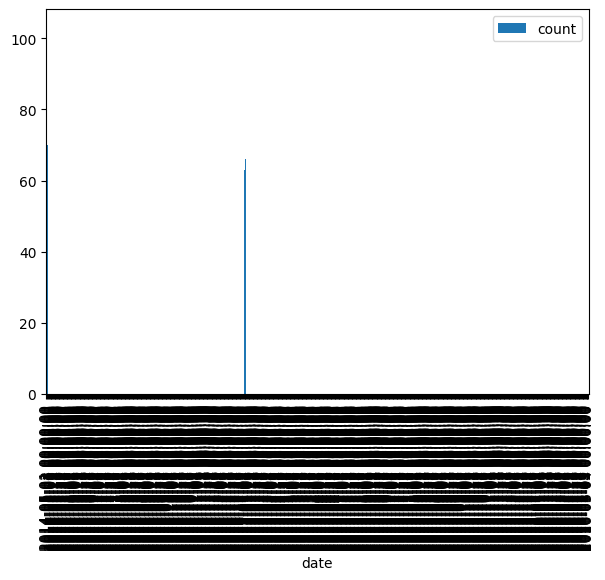

In [ ]:
df2[pd.notnull(df2['count'])].plot(kind="bar")

## Time series data with a moderately large dataset (~50000 rows)

New lets look at two input files, each containing two columns: unicode time (time stince 1/1/1970) and the measured temperature (C)


these are tab separated lists, so we will need to set the delimeter  in read_csv with "\t":

In [ ]:
!head -n 25 temperature_outdoor_2014.tsv

head: cannot open 'temperature_outdoor_2014.tsv' for reading: No such file or directory


In [ ]:
!head -n 25 temperature_indoor_2014.tsv

head: cannot open 'temperature_indoor_2014.tsv' for reading: No such file or directory


In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])

In [ ]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [ ]:
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49548 entries, 0 to 49547
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     49548 non-null  int64  
 1   outdoor  49548 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 774.3 KB


In [ ]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49548 entries, 0 to 49547
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype                           
---  ------   --------------  -----                           
 0   time     49548 non-null  datetime64[ns, Europe/Stockholm]
 1   outdoor  49548 non-null  float64                         
dtypes: datetime64[ns, Europe/Stockholm](1), float64(1)
memory usage: 774.3 KB


In [ ]:
df1 = df1.set_index("time")

In [ ]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [ ]:
df2.time = (pd.to_datetime(df2.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [ ]:
df2 = df2.set_index("time")

In [ ]:
df2.head()

,indoor
time,
2014-01-01 00:03:06+01:00,21.94
2014-01-01 00:13:06+01:00,22.00
2014-01-01 00:23:07+01:00,22.00
2014-01-01 00:33:07+01:00,22.00
2014-01-01 00:43:08+01:00,22.00


In [ ]:
df1.index[0]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

In [ ]:
df1.index[0:4]

DatetimeIndex(['2014-01-01 00:03:06+01:00', '2014-01-01 00:13:06+01:00',
               '2014-01-01 00:23:07+01:00', '2014-01-01 00:33:07+01:00'],
              dtype='datetime64[ns, Europe/Stockholm]', name='time', freq=None)

<Axes: xlabel='time'>

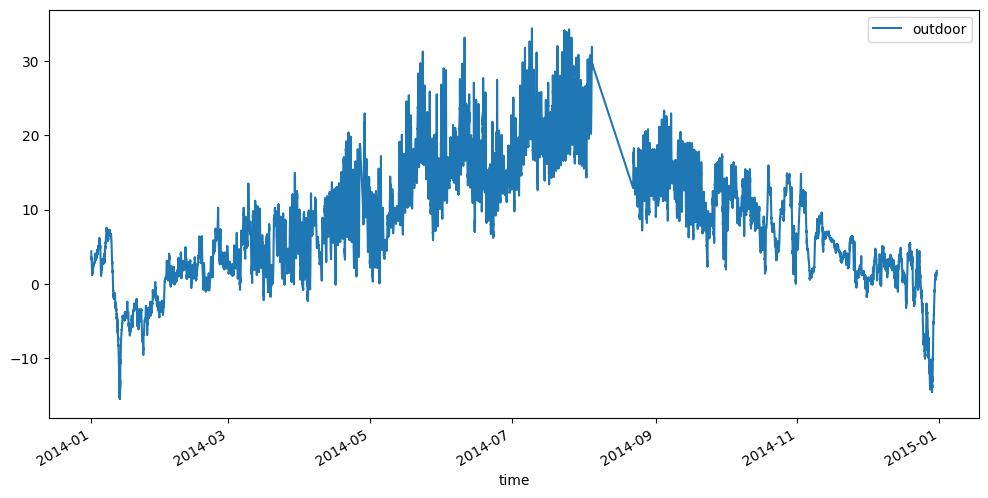

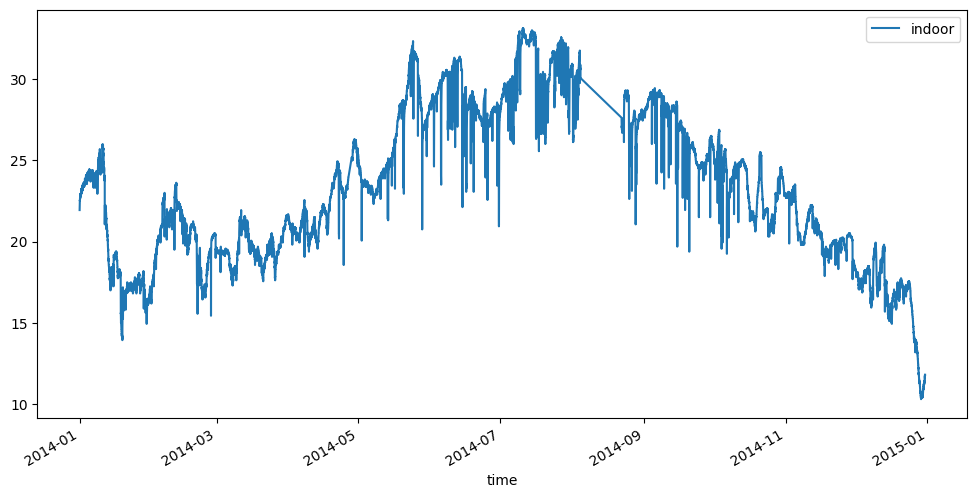

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6
df1.plot()
df2.plot()

<Axes: xlabel='time'>

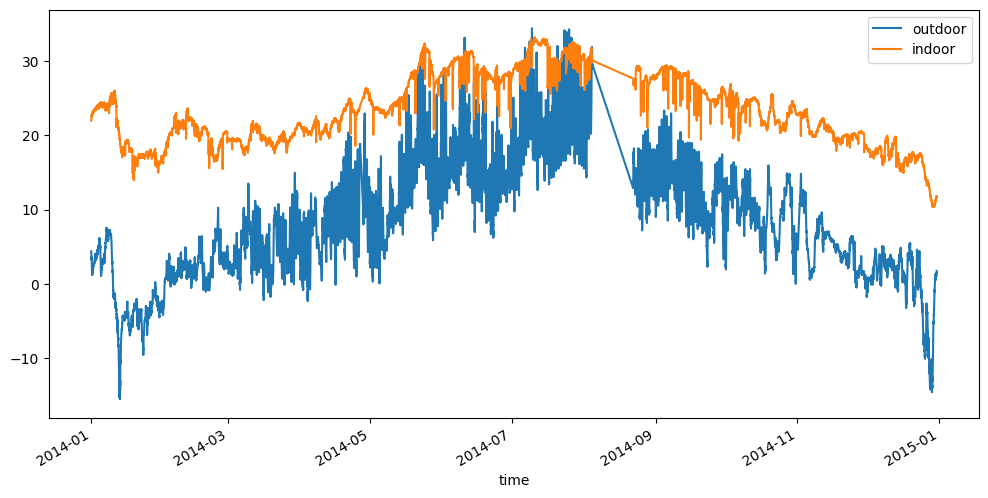

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6
ax = df1.plot()
df2.plot(ax=ax)

In [ ]:
# Since we have a time series index we can select subsets of the data (returns a boolean array)
df1.index < "2014-2-1"

array([ True,  True,  True, ..., False, False, False])

In [ ]:
df1_jan = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]

In [ ]:
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  4452 non-null   float64
dtypes: float64(1)
memory usage: 69.6 KB


In [ ]:
# we couild instead selecdt a subset of the data with slicing syntax
df2_jan = df2["2014-1-1":"2014-1-31"]

<Axes: xlabel='time'>

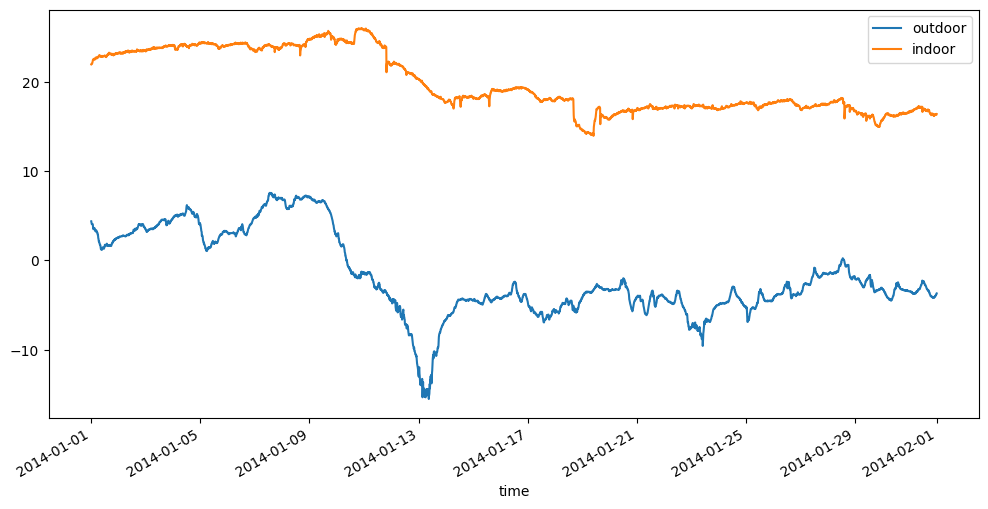

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6
ax = df1_jan.plot()
df2_jan.plot(ax=ax)

In [ ]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [ ]:
# convert an index back into a column so that we can use the apply function on the column
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html
df1_month = df1.reset_index()

In [ ]:
df1_month.head()

,time,outdoor
0,2014-01-01 00:03:06+01:00,4.38
1,2014-01-01 00:13:06+01:00,4.25
2,2014-01-01 00:23:07+01:00,4.19
3,2014-01-01 00:33:07+01:00,4.06
4,2014-01-01 00:43:08+01:00,4.06


In [ ]:
df1_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49548 entries, 0 to 49547
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype                           
---  ------   --------------  -----                           
 0   time     49548 non-null  datetime64[ns, Europe/Stockholm]
 1   outdoor  49548 non-null  float64                         
dtypes: datetime64[ns, Europe/Stockholm](1), float64(1)
memory usage: 774.3 KB


In [ ]:
df1_month.loc[0,"time"]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

In [ ]:
# use the datetime64 attribute month
df1_month.loc[0,"time"].month

1

In [ ]:
df1_month.loc[0,"time"].minute

3

In [ ]:
df1_month.loc[0,"time"].second

6

In [ ]:
# add a new column containting the month for each row
df1_month["month"] = df1_month.time.apply(lambda x: x.month)

In [ ]:
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [ ]:
df1_month.tail()

,time,outdoor,month
49543,2014-12-30 23:16:33+01:00,1.56,12
49544,2014-12-30 23:26:33+01:00,1.62,12
49545,2014-12-30 23:36:34+01:00,1.62,12
49546,2014-12-30 23:46:35+01:00,1.62,12
49547,2014-12-30 23:56:35+01:00,1.75,12


Group rows based on the column "month" and calculate a function on each group

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html

In [ ]:
df1_month.groupby("month").mean().head(12)

<ipython-input-233-4a53c8741004>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_month.groupby("month").mean().head(12)


,outdoor
month,
1,-1.776646
2,2.231613
3,4.615437
4,8.105193
5,12.261396
6,15.586955
7,20.780314
8,16.494823
9,12.823905


In [ ]:
df1_month_group_agg = df1_month.groupby("month").aggregate(np.mean)

<ipython-input-234-6fb98f56fb37>:1: FutureWarning: The operation <function mean at 0x7af371c883a0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df1_month_group_agg = df1_month.groupby("month").aggregate(np.mean)


In [ ]:
df1_month_group_agg.head(12)

,outdoor
month,
1,-1.776646
2,2.231613
3,4.615437
4,8.105193
5,12.261396
6,15.586955
7,20.780314
8,16.494823
9,12.823905


In [ ]:
# Repeat this for the indoor dataset
df2_month = df2.reset_index()
df2_month["month"] = df2_month.time.apply(lambda x: x.month)
df2_month_group_agg = df2_month.groupby("month").aggregate(np.mean)

<ipython-input-236-1e32a6cbad90>:4: FutureWarning: The operation <function mean at 0x7af371c883a0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df2_month_group_agg = df2_month.groupby("month").aggregate(np.mean)


In [ ]:
df2_month_group_agg.head(12)

,indoor
month,
1,19.862590
2,20.231507
3,19.597748
4,22.149754
5,26.332160
6,28.687491
7,30.605333
8,28.099068
9,26.950366


In [ ]:
# Join two data frames (create one dataframe with columns from both df1 and df2)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html
df_month = df1_month_group_agg.join(df2_month_group_agg)

In [ ]:
df_month.head(10)

,outdoor,indoor
month,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748
4,8.105193,22.149754
5,12.261396,26.332160
6,15.586955,28.687491
7,20.780314,30.605333
8,16.494823,28.099068
9,12.823905,26.950366


_<font color=magenta>----Begin Exercise----</font> _

Make a bar chart containing both the indoor and outdoor temperature

(Hint: you can simply plot our combined month dataframe df_month)

You may want to use grid='true' to make the plot more readable

Make a box plot summarizing the indoor and outside temperature

_<font color=magenta>----End Exercise----</font> _

In [ ]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


#### Resampling a timeseries

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html



In [ ]:
df1_hour = df1.resample("H").mean()

In [ ]:
df1_day = df1.resample("D").mean()

In [ ]:
df1_week = df1.resample("7D").mean()

In [ ]:
df1_month = df1.resample("M").mean()

In [ ]:
df1_week.head(20)

,outdoor
time,
2014-01-01 00:00:00+01:00,3.843320
2014-01-08 00:00:00+01:00,-2.006038
2014-01-15 00:00:00+01:00,-4.358897
2014-01-22 00:00:00+01:00,-3.976842
2014-01-29 00:00:00+01:00,-0.904056
2014-02-05 00:00:00+01:00,1.815616
2014-02-12 00:00:00+01:00,2.195382
2014-02-19 00:00:00+01:00,3.199446
2014-02-26 00:00:00+01:00,2.668042


In [ ]:
df1_week=df1_week.rename(columns={"outdoor": "Average weekly outdoor temperature"})

In [ ]:
df1_week

,Average weekly outdoor temperature
time,
2014-01-01 00:00:00+01:00,3.843320
2014-01-08 00:00:00+01:00,-2.006038
2014-01-15 00:00:00+01:00,-4.358897
2014-01-22 00:00:00+01:00,-3.976842
2014-01-29 00:00:00+01:00,-0.904056
2014-02-05 00:00:00+01:00,1.815616
2014-02-12 00:00:00+01:00,2.195382
2014-02-19 00:00:00+01:00,3.199446
2014-02-26 00:00:00+01:00,2.668042


In [ ]:
df1_hour  = df1_hour.rename(columns={"outdoor": "Average hourly outdoor temperature"})
df1_day   = df1_day.rename(columns={"outdoor": "Average daily outdoor temperature"})
df1_month = df1_month.rename(columns={"outdoor": "Average monthly outdoor temperature"})

In [ ]:
df_diff_week = (df1.resample("W").outdoor.mean() - df2.resample("W").indoor.mean())
df_diff_day  = (df1.resample("D").outdoor.mean() - df2.resample("D").indoor.mean())

<Axes: xlabel='time'>

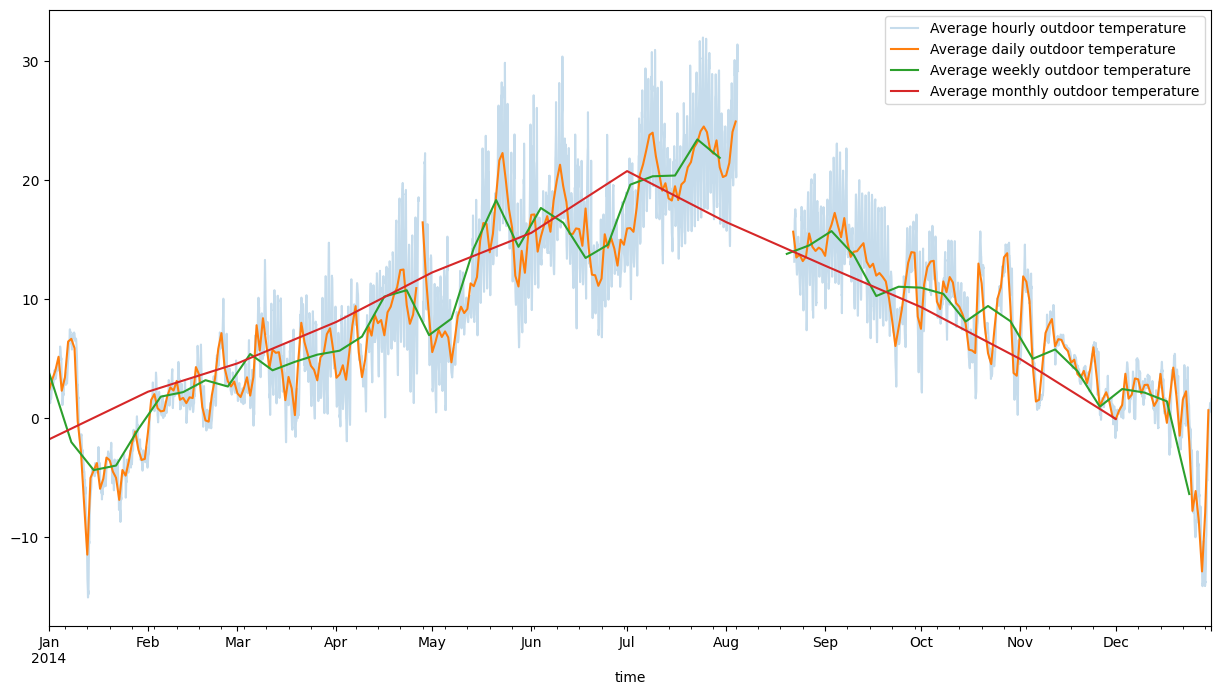

In [ ]:
plt.rcParams['figure.figsize'] = 15, 8
ax = df1_hour.plot(alpha=0.25)
df1_day.plot(ax=ax)
df1_week.plot(ax=ax)
df1_month.plot(ax=ax)


<Axes: xlabel='time'>

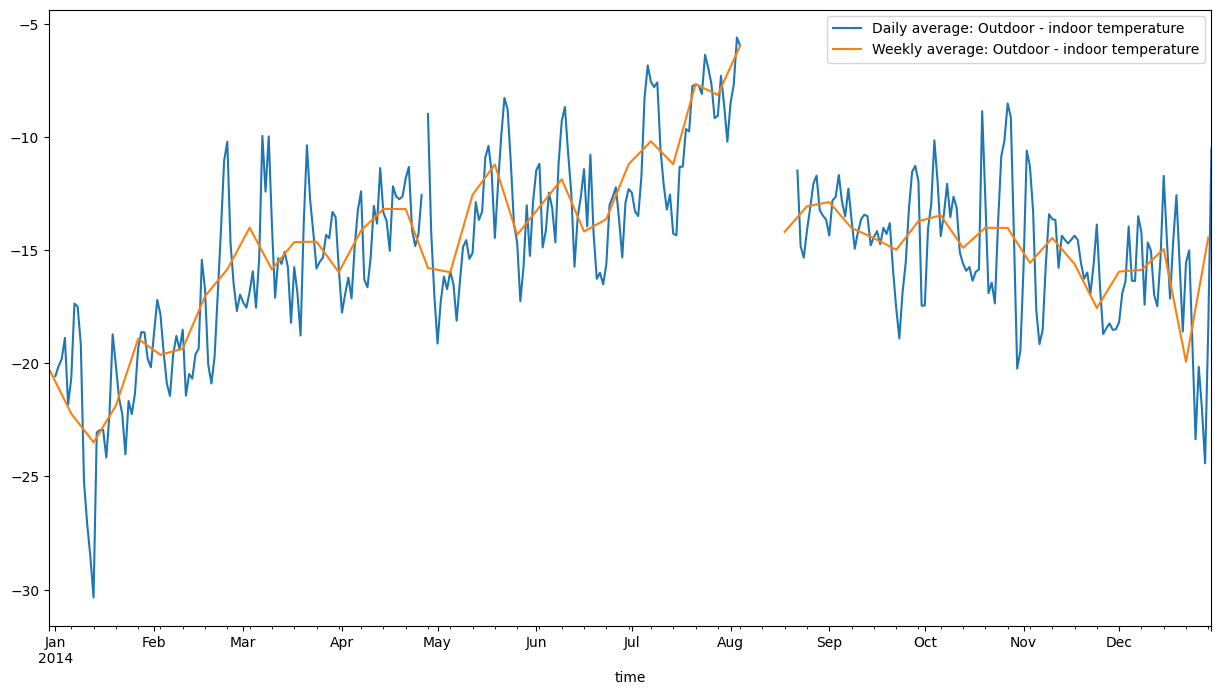

In [ ]:
ax2 = df_diff_day.plot(label="Daily average: Outdoor - indoor temperature",legend=True)
df_diff_week.plot(ax=ax2,label="Weekly average: Outdoor - indoor temperature",legend=True)

<Axes: ylabel='Frequency'>

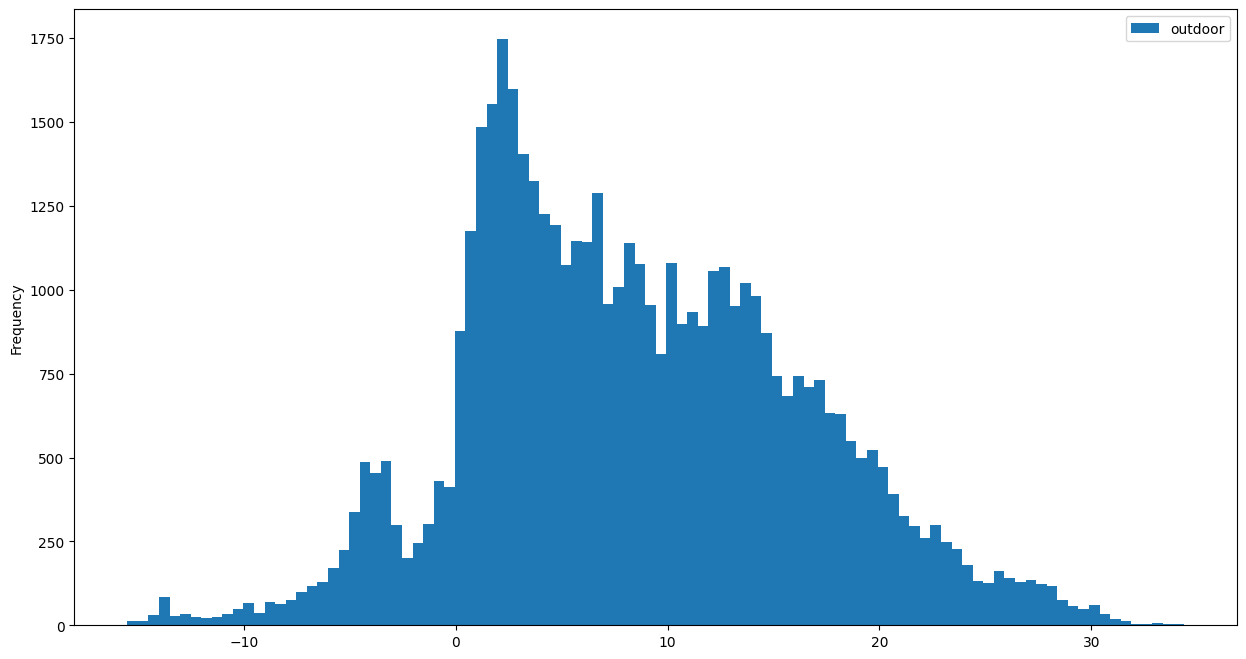

In [ ]:
df1.plot.hist(bins=100)

<Axes: ylabel='Frequency'>

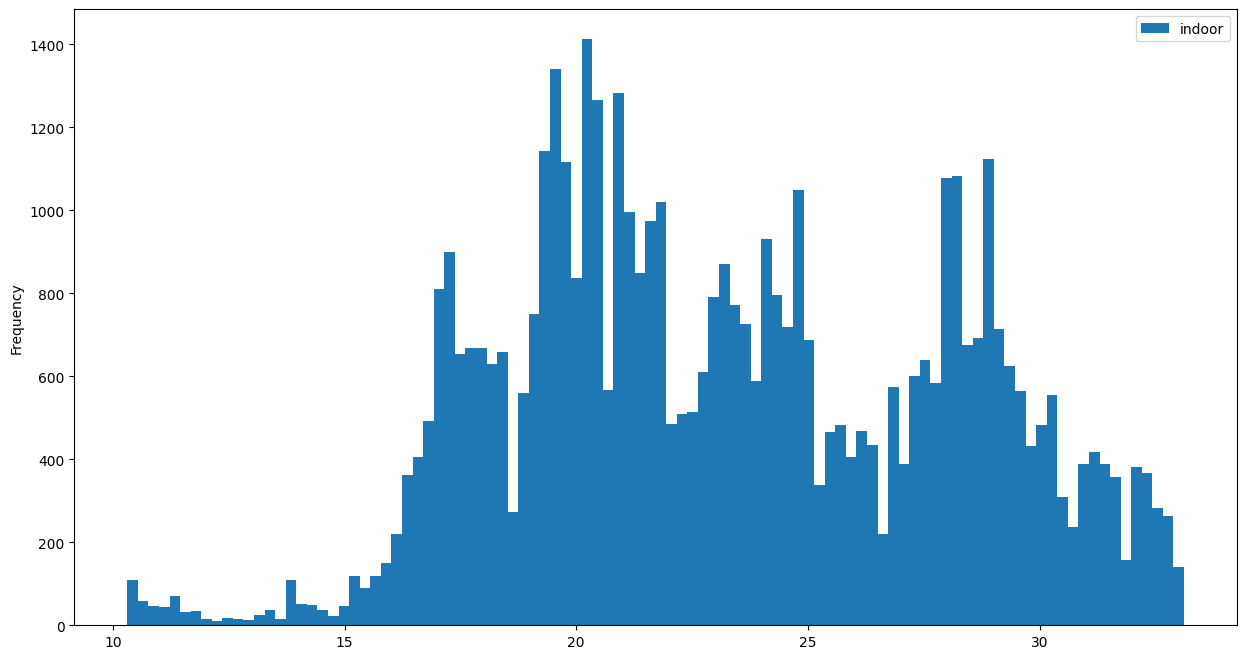

In [ ]:
df2.plot.hist(bins=100)

<Axes: ylabel='Frequency'>

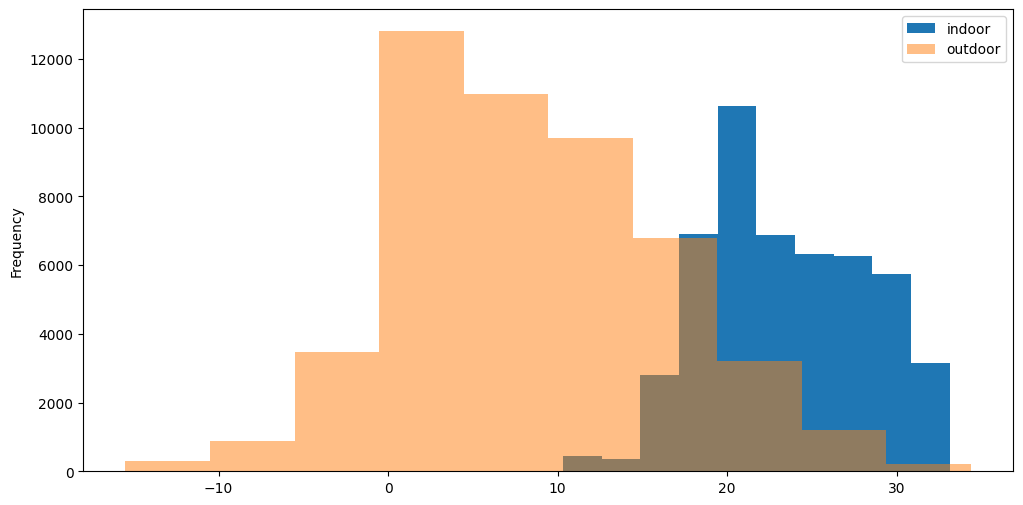

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6
ax = df2.plot.hist()
df1.plot.hist(ax=ax,alpha=0.5)